## En este programa integramos el problema de 2 cuerpos (P2C). 
## Todos los datos son facilmente modificables y los programas son facilmente reproducibles.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Generamos las condiciones iniciales

In [2]:
G = 4.299e-6   # Unidades kpc*Msol^-1*(km/s)**2
eps = 0.9      #softening 
N = 2

e = 0.7     # excentricidad de la orbita
p = 10.     #distancia al pericentro
a = p/(1-e) #el semieje lo definimos asi para que 
            #la particula siempre este inicialmente en 10kpc

m = np.array([5e11, 1e5]) #masas

mu = G *(m[0]+m[1])
nn = np.sqrt(mu/a**3)

vp = nn * a * np.sqrt((1+e)/(1-e)) #velocidad en el pericentro
# vp=0.
print vp

604.4957180022038


In [3]:
apo = a*(1+e)
b = a * np.sqrt(1-e**2)
print b, a

23.804761428476162 33.3333333333


In [4]:
#periodo
T = 2*pi/nn
print T

0.8247630920233773


In [5]:
#posiciones y velocidades iniciales

pos = np.array([[0.,0.,0.],[p,0.,0.]])

vel = np.array([[0.,0.,0.],[0.,vp,0.]])


In [6]:
print pos

[[ 0.  0.  0.]
 [10.  0.  0.]]


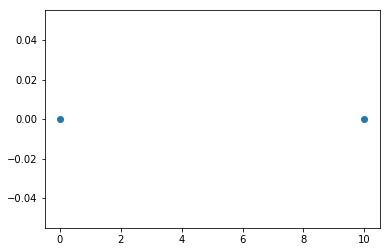

In [7]:
plt.plot(pos[:,0],pos[:,1],'o')

In [8]:
from integradorespdc import *

ax,ay,az = integradores_modificado.aceleracion(eps,m,pos[:,0],pos[:,1],pos[:,2])

### Acá definimos el paso y el numero de pasos

In [9]:
dt = 0.0005  #paso
nit = 1000000 #numero de pasos

# EULER

In [12]:
from integradorespdc import *

integradores_modificado.euler(eps,dt,nit,m,pos[:,0],pos[:,1],pos[:,2],vel[:,0],vel[:,1],vel[:,2],ax,ay,az)


(array([ -8.55939288e-06,   5.08475151e+01], dtype=float32),
 array([  0.06044272,  14.55122948], dtype=float32),
 array([ 0.,  0.], dtype=float32),
 array([ -8.06055141e-06,   4.02936401e+01], dtype=float32),
 array([  9.48253073e-05,   1.30363968e+02], dtype=float32),
 array([ 0.,  0.], dtype=float32),
 array([  1.47832572e-04,  -7.39162842e+02], dtype=float32),
 array([  4.21300792e-05,  -2.10650391e+02], dtype=float32),
 array([ 0.,  0.], dtype=float32))

In [14]:
# path = '/home/omarioni/mn2/_data/P2C/euler/'

# xf = np.zeros((nit/10,len(m)))
# yf = np.zeros((nit/10,len(m)))
# zf = np.zeros((nit/10,len(m)))

# j=0
# for i in np.arange(0,nit,10):
    
#     posf = np.loadtxt(path+'posiciones'+str('%s'%i)+'.dat')
    
#     xf[j,:] = posf[:,0]
#     yf[j,:] = posf[:,1]
#     zf[j,:] = posf[:,2]
    
#     j += 1

In [10]:
path = '/home/omarioni/mn2/_data/P2C/fortran_run/'

N = 2

posf = np.loadtxt(path+'pos_euler.dat')
xf = posf[:,0:N]
yf = posf[:,N:2*N]
zf = posf[:,2*N:3*N]

velf = np.loadtxt(path+'vel_euler.dat')
vxf = velf[:,0:N]
vyf = velf[:,N:2*N]
vzf = velf[:,2*N:3*N]

print shape(xf)

IndexError: too many indices for array

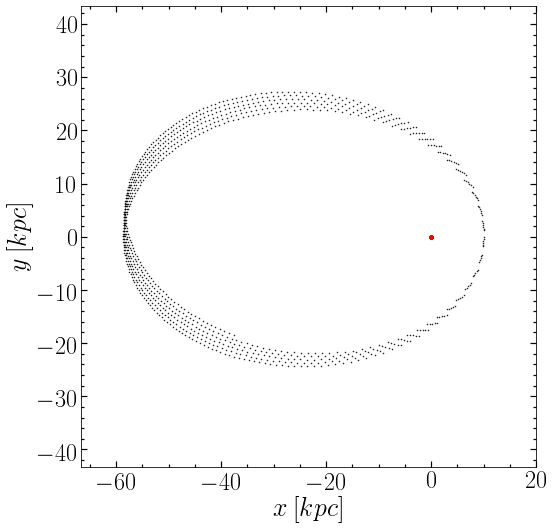

In [14]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(xf[:1000,1],yf[:1000,1],'.k', markersize=1)
ax.plot(xf[:1000,0],yf[:1000,0],'.r')
# ax.plot(xf[-1,1],yf[-1,1],'.b')
ax.set_xlim(-apo-10,p+10)
ax.set_ylim(-a-10,a+10)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [17]:
# import fuerza as fz

# U = np.zeros(nit/10)
# K = np.zeros(nit/10)

# path = '/home/omarioni/mn2/_data/P2C/euler/'

# j=0
# for i in np.arange(0,nit,10):
#     posf = np.loadtxt(path+'posiciones'+str('%s'%i)+'.dat')
#     velf = np.loadtxt(path+'velocidades'+str('%s'%i)+'.dat')
    
#     Uf = fz.epot(eps,posf[:,0],posf[:,1],posf[:,2],m)
#     Kf = m * (velf[:,0]**2 + velf[:,1]**2 + velf[:,2]**2)

#     U[j] = 0.5 * np.sum(Uf,axis=0)
#     K[j] = 0.5 * np.sum(Kf,axis=0)
#     j += 1


In [19]:
# E = K - U
# dE = (E - E[0])/abs(E[0])
# time = dt * np.arange(0,nit,10)

In [13]:
from energia import *
eps=0.9
e_pot = np.zeros([1+nit/10,N])

for i in np.arange(1+nit/10):
    e_pot[i] = energia.epot(eps,m,xf[i,:],yf[i,:],zf[i,:])


In [14]:
U = np.sum(e_pot,axis =1)

print shape(U)

K = (1/2.) * m * (vxf**2 + vyf**2 + vzf**2)

K = np.sum(K,axis=1)
print shape(K)

E = K - 0.5*U

dE = (E - E[0])/abs(E[0])
time = dt * np.arange(10,nit+20,10) 
print shape(time)

(100001,)
(100001,)
(100001,)


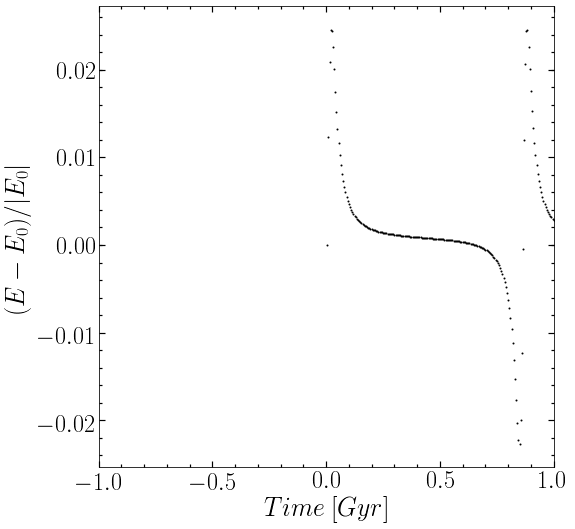

In [16]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,dE,'.k', markersize=2)
ax.set_xlim(-1,1)
# ax.set_ylim(-0.2,0.2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$(E-E_{0})/|E_{0}|$', fontsize=26)
ax.set_xlabel(r'$Time\:[Gyr]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

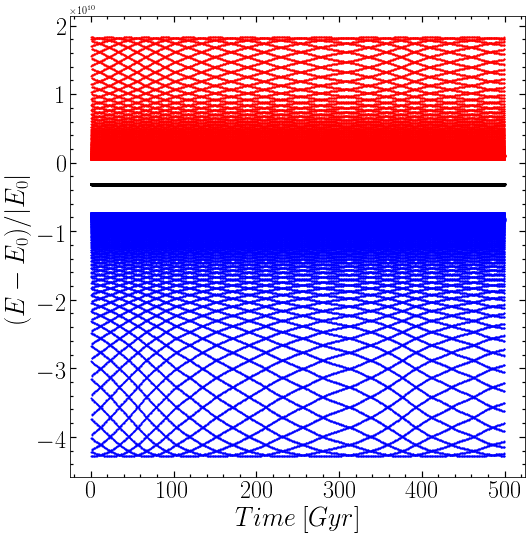

In [22]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,E,'.k', markersize=2)
ax.plot(time,K,'.r', markersize=2)
ax.plot(time,-U,'.b', markersize=2)
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-0.2,0.2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$(E-E_{0})/|E_{0}|$', fontsize=26)
ax.set_xlabel(r'$Time\:[Gyr]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

# RUNGE

In [11]:
from integradorespdc import *

runge_ = integradores_modificado.rungek(eps,dt,nit,m,pos[:,0],pos[:,1],pos[:,2],vel[:,0],vel[:,1],vel[:,2],ax,ay,az)

In [11]:
path = '/home/omarioni/mn2/_data/P2C/fortran_run/'

posf = np.loadtxt(path+'pos_runge.dat')

xf = posf[:,0:N]
yf = posf[:,N:2*N]
zf = posf[:,2*N:3*N]

velf = np.loadtxt(path+'vel_runge.dat')

vxf = velf[:,0:N]
vyf = velf[:,N:2*N]
vzf = velf[:,2*N:3*N]

print shape(xf)

(100001, 2)


/home/omarioni/miniconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


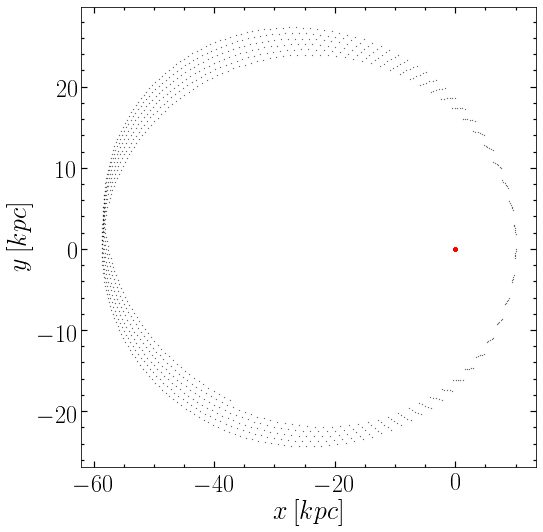

In [12]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(xf[:1000,1],yf[:1000,1],'.k', markersize=0.5)
ax.plot(xf[:1000,0],yf[:1000,0],'.r')
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-a-10,a+10)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [13]:
from energia import *

e_pot = np.zeros([1+nit/10,N])

for i in np.arange(1+nit/10):
    e_pot[i] = energia.epot(eps,m,xf[i,:],yf[i,:],zf[i,:])

In [22]:
U = np.sum(e_pot,axis =1)
print shape(U)

K = (1/2.) * m * (vxf**2 + vyf**2 + vzf**2)
K = np.sum(K,axis=1)
print shape(K)

E = K - 0.5*U

dE = (E - E[0])/abs(E[0])
time = dt * np.arange(10,nit+20,10) 
print shape(time)

(100001,)
(100001,)
(100001,)


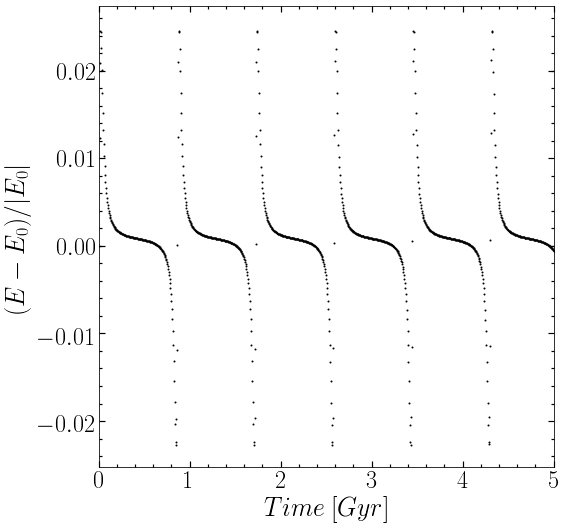

In [24]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,dE,'.k', markersize=2)
# ax.set_xlim(-apo-10,p+10)
ax.set_xlim(0,5)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$(E-E_{0})/|E_{0}|$', fontsize=26)
ax.set_xlabel(r'$Time\:[Gyr]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

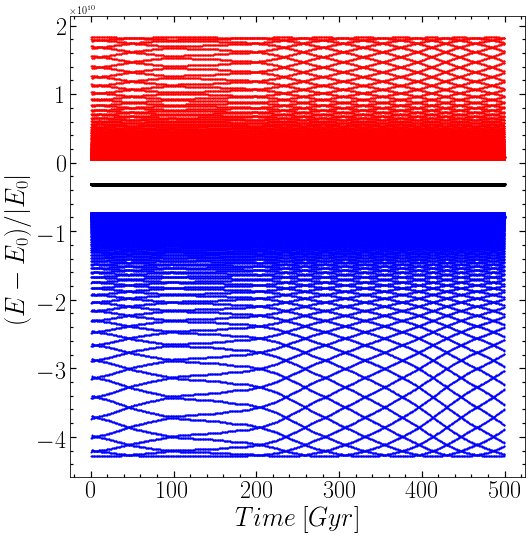

In [23]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,E,'.k', markersize=2)
ax.plot(time,K,'.r', markersize=2)
ax.plot(time,-U,'.b', markersize=2)
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-0.2,0.2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$(E-E_{0})/|E_{0}|$', fontsize=26)
ax.set_xlabel(r'$Time\:[Gyr]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

# LEAPFROG -KDK

In [36]:
from integradorespdc import *
lfkdk_ = integradores_modificado.kickdkick(eps,dt,nit,m,pos[:,0],pos[:,1],pos[:,2],vel[:,0],vel[:,1],vel[:,2],ax,ay,az)

In [19]:
# import integradores as intg
    
# posf,velf,acf = intg.KDK(eps,dt,nit,m,pos,vel,acel)

In [20]:
# print pos, posf

[[  0.   0.   0.]
 [ 10.   0.   0.]] [[  7.67538500e-06   1.15889704e-04   0.00000000e+00]
 [ -2.83769250e+01   2.50471976e+01   0.00000000e+00]]


In [21]:
# path = '/home/omarioni/mn2/_data/P2C/KDK/'

# xf = np.zeros((nit/10,len(m)))
# yf = np.zeros((nit/10,len(m)))
# zf = np.zeros((nit/10,len(m)))

# j=0
# for i in np.arange(0,nit,10):
    
#     posf = np.loadtxt(path+'posiciones'+str('%s'%i)+'.dat')
    
#     xf[j,:] = posf[:,0]
#     yf[j,:] = posf[:,1]
#     zf[j,:] = posf[:,2]
    
#     j += 1

In [25]:
path = '/home/omarioni/mn2/_data/P2C/fortran_run/'

posf = np.loadtxt(path+'pos_KDK.dat')

xf = posf[:,0:N]
yf = posf[:,N:2*N]
zf = posf[:,2*N:3*N]

velf = np.loadtxt(path+'vel_KDK.dat')

vxf = velf[:,0:N]
vyf = velf[:,N:2*N]
vzf = velf[:,2*N:3*N]

print shape(xf)

(100001, 2)


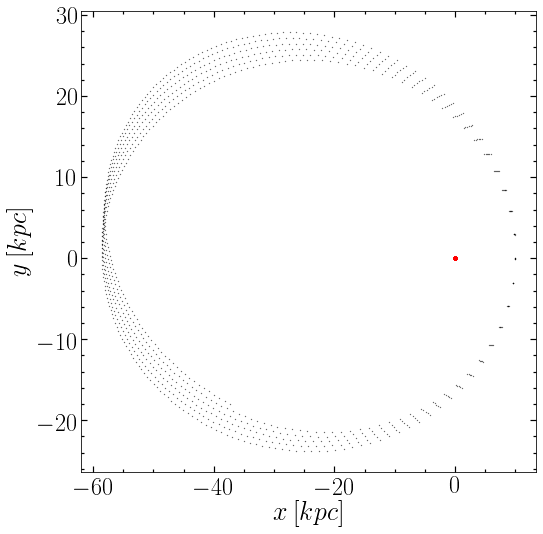

In [26]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(xf[:1000,1],yf[:1000,1],'.k', markersize=0.5)
ax.plot(xf[:1000,0],yf[:1000,0],'.r')
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-a-10,a+10)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [35]:
# import fuerza as fz

# U = np.zeros(nit/10)
# K = np.zeros(nit/10)

# path = '/home/omarioni/mn2/_data/P2C/KDK/'

# j=0
# for i in np.arange(0,nit,10):
#     posf = np.loadtxt(path+'posiciones'+str('%s'%i)+'.dat')
#     velf = np.loadtxt(path+'velocidades'+str('%s'%i)+'.dat')
    
#     Uf = fz.epot(eps,posf[:,0],posf[:,1],posf[:,2],m)
#     Kf = m * (velf[:,0]**2 + velf[:,1]**2 + velf[:,2]**2)

#     U[j] = 0.5 * np.sum(Uf,axis=0)
#     K[j] = 0.5 * np.sum(Kf,axis=0)
#     j += 1
    


In [36]:
# E = K - U
# dE = (E - E[0])/abs(E[0])
# time = dt * np.arange(0,nit,10)

In [27]:
from energia import *

e_pot = np.zeros([1+nit/10,N])

for i in np.arange(1+nit/10):
    e_pot[i] = energia.epot(eps,m,xf[i,:],yf[i,:],zf[i,:])


In [28]:
U = np.sum(e_pot,axis =1)

print shape(U)

K = (1/2.) * m * (vxf**2 + vyf**2 + vzf**2)

K = np.sum(K,axis=1)
print shape(K)

E = K - 0.5*U

dE = (E - E[0])/abs(E[0])
time = dt * np.arange(10,nit+20,10) 
print shape(time)

(100001,)
(100001,)
(100001,)


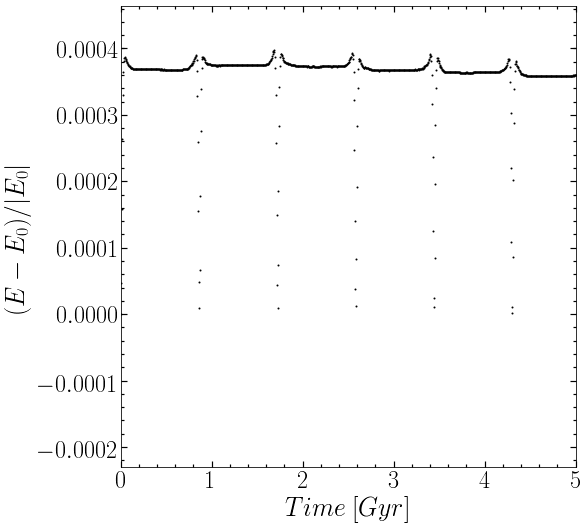

In [29]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,dE,'.k', markersize=2)
ax.set_xlim(0,5)
# ax.set_ylim(-0.2,0.2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$(E-E_{0})/|E_{0}|$', fontsize=26)
ax.set_xlabel(r'$Time\:[Gyr]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

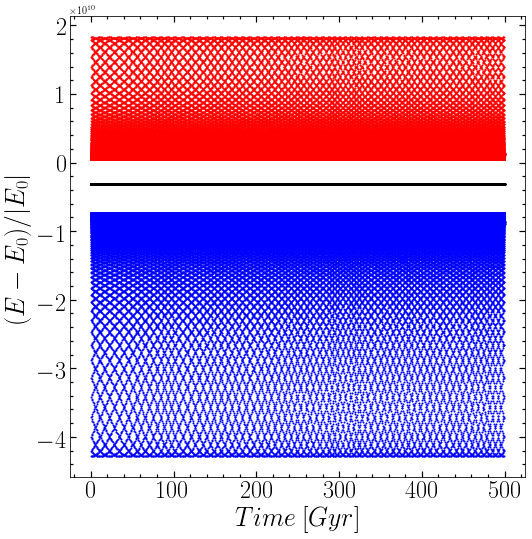

In [42]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,E,'.k', markersize=2)
ax.plot(time,K,'.r', markersize=2)
ax.plot(time,-U,'.b', markersize=2)
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-0.2,0.2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$(E-E_{0})/|E_{0}|$', fontsize=26)
ax.set_xlabel(r'$Time\:[Gyr]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

# LEAPFROG -DKD

In [52]:
from integradorespdc import *
lfdkd_ = integradores_modificado.driftkdrift(eps,dt,nit,m,pos[:,0],pos[:,1],pos[:,2],vel[:,0],vel[:,1],vel[:,2],ax,ay,az)

In [27]:
# import integradores as intg
    
# posf,velf,acf = intg.DKD(eps,dt,nit,m,pos,vel,acel)

In [29]:
# path = '/home/omarioni/mn2/_data/P2C/DKD/'

# xf = np.zeros((nit/10,len(m)))
# yf = np.zeros((nit/10,len(m)))
# zf = np.zeros((nit/10,len(m)))

# j=0
# for i in np.arange(0,nit,10):
    
#     posf = np.loadtxt(path+'posiciones'+str('%s'%i)+'.dat')
    
#     xf[j,:] = posf[:,0]
#     yf[j,:] = posf[:,1]
#     zf[j,:] = posf[:,2]
    
#     j += 1

In [30]:
path = '/home/omarioni/mn2/_data/P2C/fortran_run/'

posf = np.loadtxt(path+'pos_DKD.dat')

xf = posf[:,0:N]
yf = posf[:,N:2*N]
zf = posf[:,2*N:3*N]

velf = np.loadtxt(path+'vel_DKD.dat')

vxf = velf[:,0:N]
vyf = velf[:,N:2*N]
vzf = velf[:,2*N:3*N]

print shape(xf)

(100001, 2)


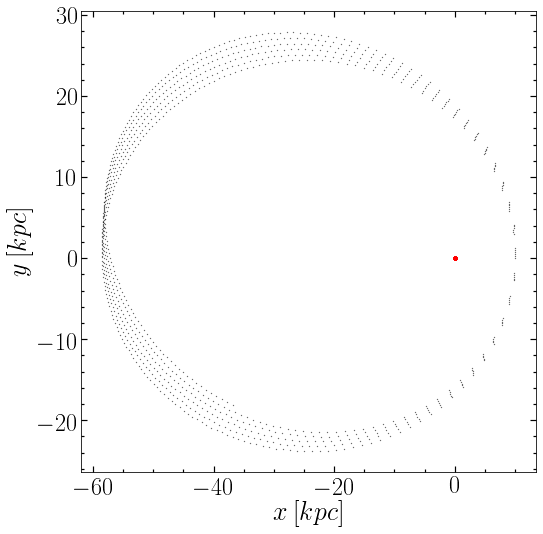

In [31]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(xf[:1000,1],yf[:1000,1],'.k', markersize=0.5)
ax.plot(xf[:1000,0],yf[:1000,0],'.r')
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-a-10,a+10)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [31]:
# import fuerza as fz

# U = np.zeros(nit/10)
# K = np.zeros(nit/10)

# path = '/home/omarioni/mn2/_data/P2C/DKD/'

# j=0
# for i in np.arange(0,nit,10):
#     posf = np.loadtxt(path+'posiciones'+str('%s'%i)+'.dat')
#     velf = np.loadtxt(path+'velocidades'+str('%s'%i)+'.dat')
    
#     Uf = fz.epot(eps,posf[:,0],posf[:,1],posf[:,2],m)
#     Kf = m * (velf[:,0]**2 + velf[:,1]**2 + velf[:,2]**2)

#     U[j] = 0.5 * np.sum(Uf,axis=0)
#     K[j] = 0.5 * np.sum(Kf,axis=0)
#     j += 1
    
# E = K - U
# # print len(Uf)
# #     print Uf, Kf

In [32]:
# E = K - U
# dE = (E - E[0])/abs(E[0])
# time = dt * np.arange(0,nit,10)

In [32]:
from energia import *

e_pot = np.zeros([1+nit/10,N])

for i in np.arange(1+nit/10):
    e_pot[i] = energia.epot(eps,m,xf[i,:],yf[i,:],zf[i,:])


In [33]:
U = np.sum(e_pot,axis =1)

print shape(U)

K = (1/2.) * m * (vxf**2 + vyf**2 + vzf**2)

K = np.sum(K,axis=1)
print shape(K)

E = K - 0.5*U

dE = (E - E[0])/abs(E[0])
time = dt * np.arange(10,nit+20,10) 
print shape(time)

(100001,)
(100001,)
(100001,)


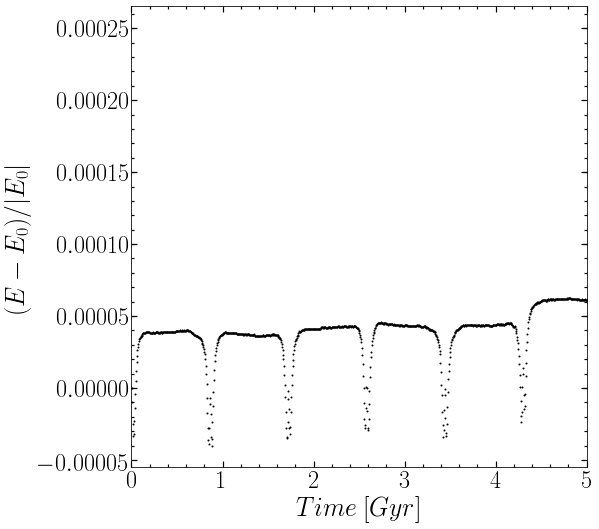

In [34]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,dE,'.k', markersize=2)
ax.set_xlim(0,5)
# ax.set_ylim(-0.2,0.2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$(E-E_{0})/|E_{0}|$', fontsize=26)
ax.set_xlabel(r'$Time\:[Gyr]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

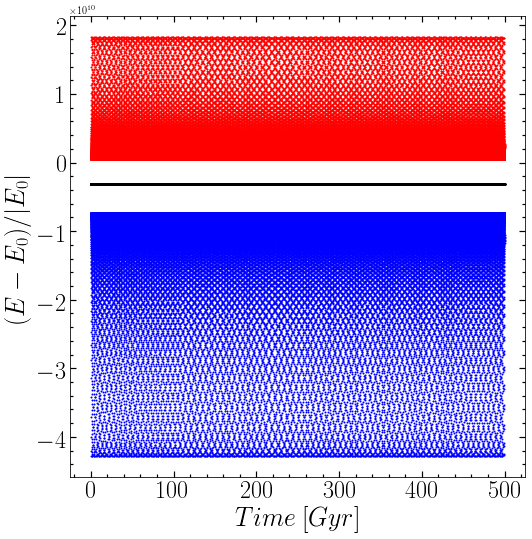

In [58]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,E,'.k', markersize=2)
ax.plot(time,K,'.r', markersize=2)
ax.plot(time,-U,'.b', markersize=2)
# ax.set_xlim(-apo-10,p+10)
# ax.set_ylim(-0.2,0.2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$(E-E_{0})/|E_{0}|$', fontsize=26)
ax.set_xlabel(r'$Time\:[Gyr]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()